<a href="https://colab.research.google.com/github/shivakm876/exam-p-f-prediction/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/students-performance-in-exams


In [3]:
# prompt:  Load the "StudentsPerformance.csv" dataset into a pandas DataFrame

import pandas as pd
df = pd.read_csv( '/content/StudentsPerformance.csv')
print(df.head())


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [4]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Data Cleaning


In [5]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [6]:
print(df.describe())



       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [7]:
#Why Encode Categorical Variables?
#Even if there are no missing values, categorical columns still need to be converted into numbers, because:

#ML algorithms can't interpret strings.

#It helps the model understand the patterns in data.



In [8]:
print(df.dtypes)

# Check unique values in categorical columns
for col in df.select_dtypes(include='object'):
    print(f"{col}: {df[col].unique()}")


gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object
gender: ['female' 'male']
race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch: ['standard' 'free/reduced']
test preparation course: ['none' 'completed']


In [9]:
# Strip whitespace & lowercase to avoid case issues
for col in df.select_dtypes(include='object'):
    df[col] = df[col].str.strip().str.lower()



In [10]:
from sklearn.preprocessing import LabelEncoder # Correct import statement

In [11]:
# Initialize LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to all object columns (binary/ordinal categorical columns)
for col in df.select_dtypes(include='object'):
    # Check if the column is binary/ordinal, apply Label Encoding
    if df[col].nunique() == 2:  # If there are only two categories, use Label Encoding (binary)
        df[col] = le.fit_transform(df[col])
    else:
        # Otherwise, apply One-Hot Encoding (for nominal columns with more than 2 categories)
        df = pd.get_dummies(df, columns=[col], drop_first=True)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   gender                                         1000 non-null   int64
 1   lunch                                          1000 non-null   int64
 2   test preparation course                        1000 non-null   int64
 3   math score                                     1000 non-null   int64
 4   reading score                                  1000 non-null   int64
 5   writing score                                  1000 non-null   int64
 6   race/ethnicity_group b                         1000 non-null   bool 
 7   race/ethnicity_group c                         1000 non-null   bool 
 8   race/ethnicity_group d                         1000 non-null   bool 
 9   race/ethnicity_group e                         1000 non-null   bool 
 10  p

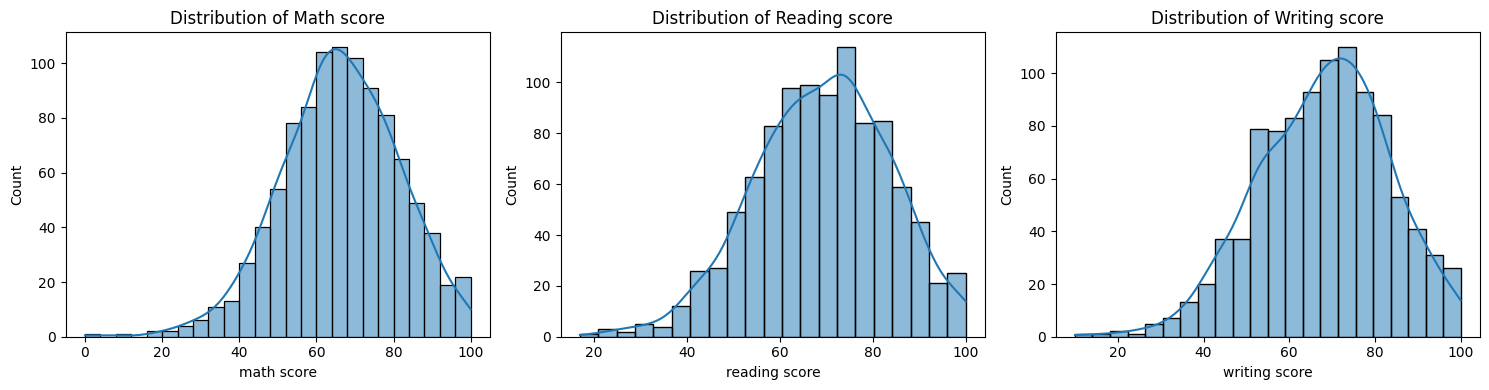

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 4))
for i, score in enumerate(["math score", "reading score", "writing score"]):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[score], kde=True)
    plt.title(f"Distribution of {score.capitalize()}")
plt.tight_layout()
plt.show()


Pass count: 865
Fail count: 135
Pass percentage: 86.50%
Fail percentage: 13.50%


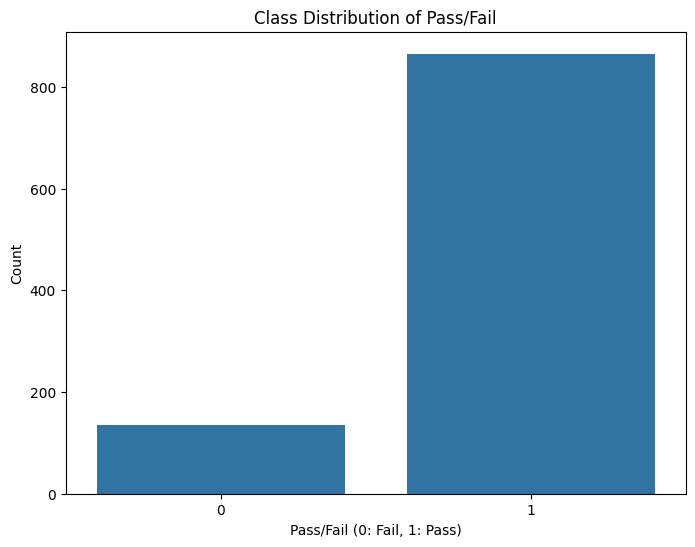

In [14]:
# prompt: check imbalnce of the data  by creatineg targertvarible as pass_fail

# Create 'pass_fail' column based on math score
df['pass_fail'] = df['math score'].apply(lambda x: 1 if x >= 50 else 0)

# Check the class imbalance
pass_count = df['pass_fail'].value_counts()[1]
fail_count = df['pass_fail'].value_counts()[0]
total_count = len(df)

print(f"Pass count: {pass_count}")
print(f"Fail count: {fail_count}")

pass_percentage = (pass_count / total_count) * 100
fail_percentage = (fail_count / total_count) * 100

print(f"Pass percentage: {pass_percentage:.2f}%")
print(f"Fail percentage: {fail_percentage:.2f}%")


# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='pass_fail', data=df)
plt.title('Class Distribution of Pass/Fail')
plt.xlabel('Pass/Fail (0: Fail, 1: Pass)')
plt.ylabel('Count')
plt.show()


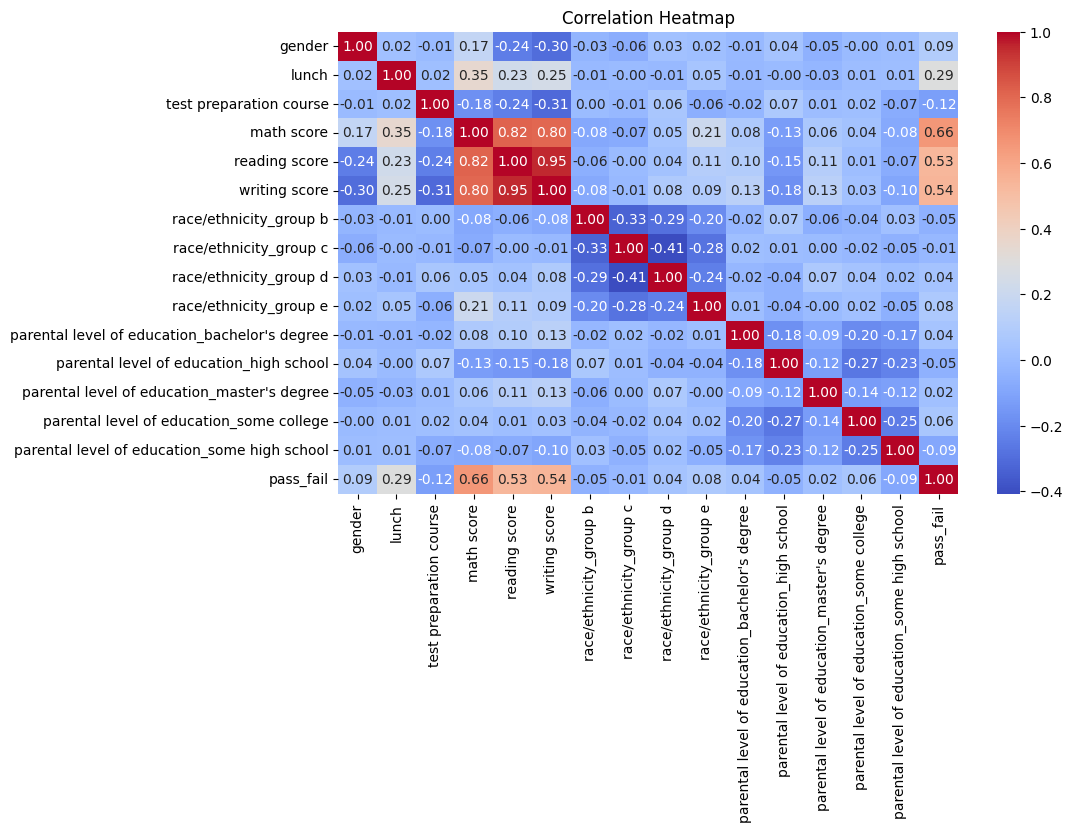

In [15]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


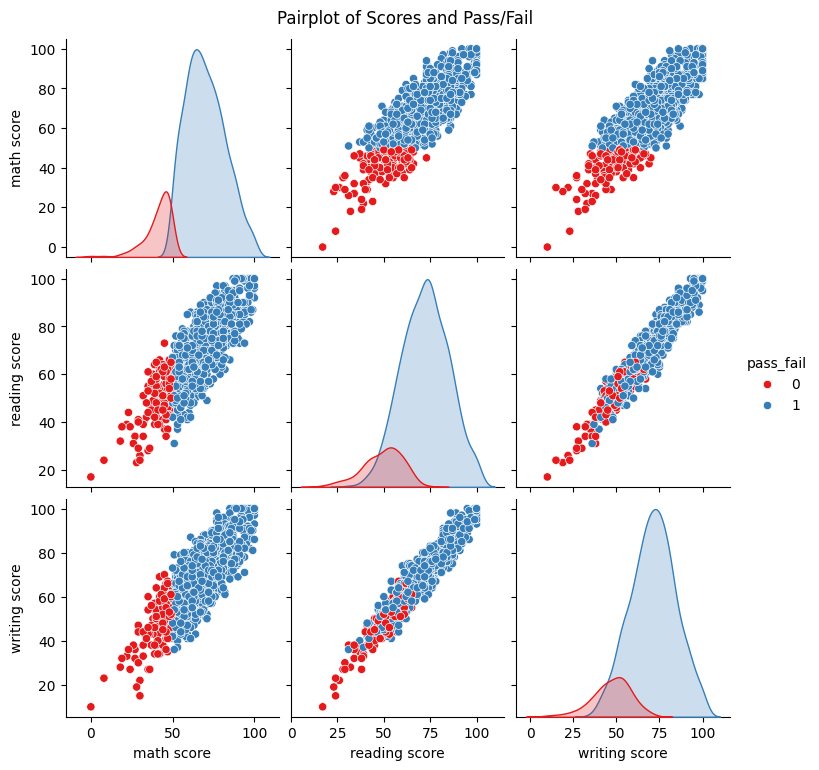

In [16]:
sns.pairplot(df[['math score', 'reading score', 'writing score',  'pass_fail']],
             hue='pass_fail', palette='Set1')
plt.suptitle("Pairplot of Scores and Pass/Fail", y=1.02)
plt.show()


<Axes: >

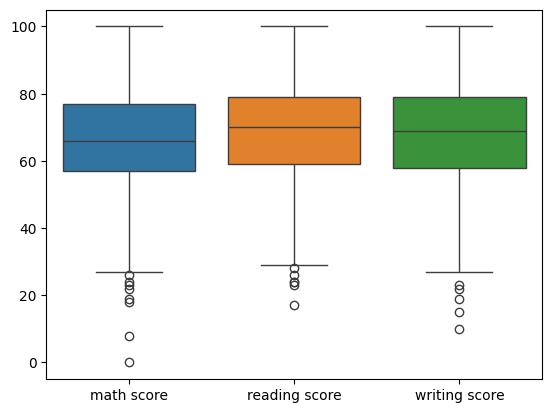

In [17]:
import seaborn as sns
sns.boxplot(data=df[['math score', 'reading score', 'writing score']])


Feature Enginnering

In [18]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']


In [19]:
df['pass/fail'] = df['total score'].apply(lambda x: 1 if x >= 150 else 0)


In [20]:
df['math_to_reading'] = df['math score'] / df['reading score']


In [21]:
df['writing_to_total'] = df['writing score'] / df['total score']


In [22]:
def categorize_score(score):
    if score < 50:
        return 'low'
    elif 50 <= score < 75:
        return 'medium'
    else:
        return 'high'

df['math category'] = df['math score'].apply(categorize_score)
df['reading category'] = df['reading score'].apply(categorize_score)
df['writing category'] = df['writing score'].apply(categorize_score)


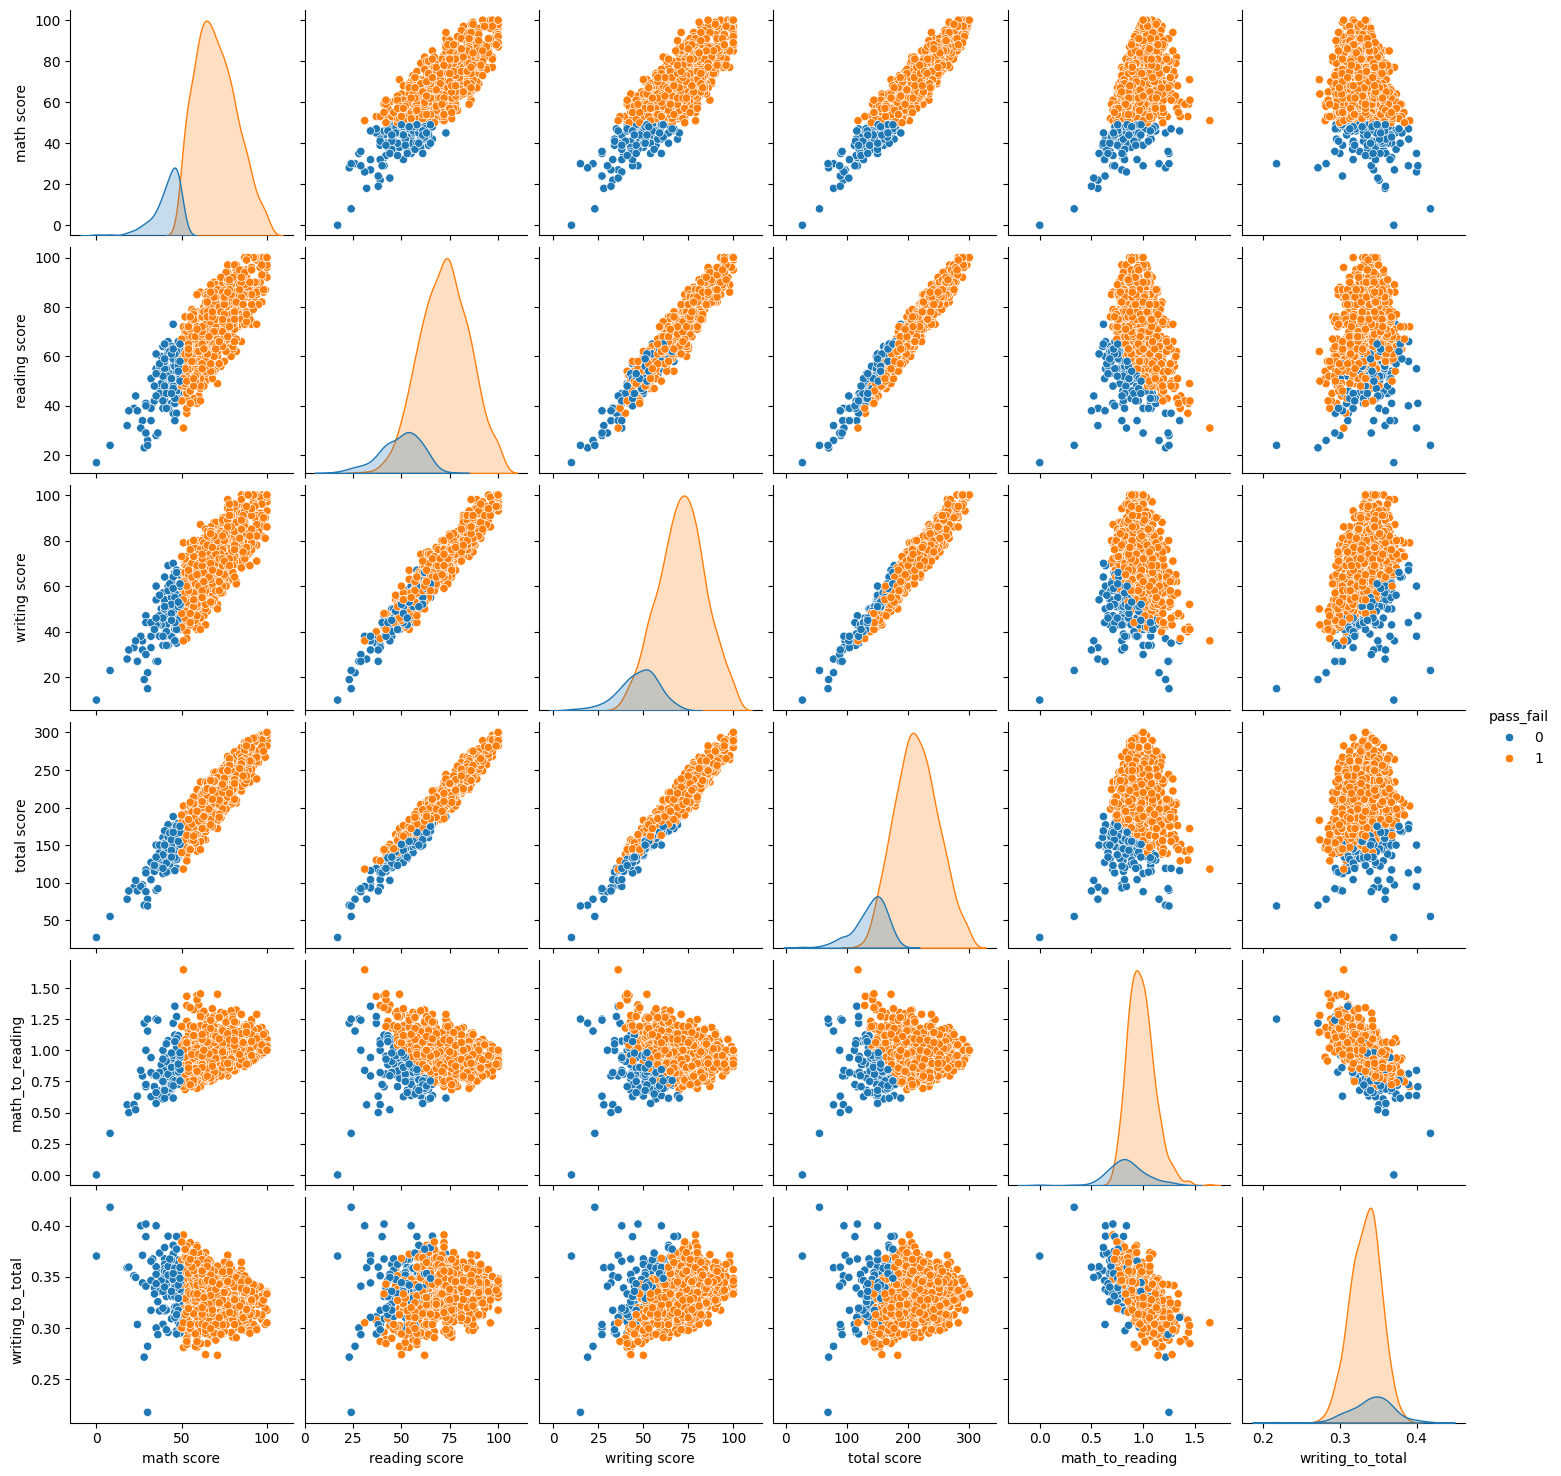

In [23]:
# Recreate the pairplot with new features included (optional but insightful)
import seaborn as sns
sns.pairplot(df, hue='pass_fail', vars=['math score', 'reading score', 'writing score', 'total score', 'math_to_reading', 'writing_to_total'])


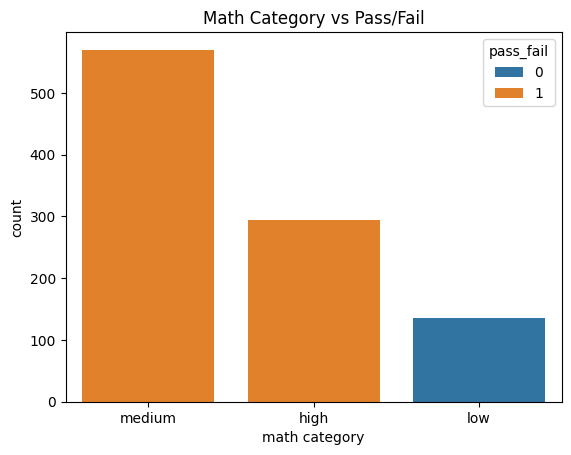

In [24]:
# Bar plot for categorical score groups
sns.countplot(x='math category', hue='pass_fail', data=df)
plt.title('Math Category vs Pass/Fail')
plt.show()


In [25]:
# Example: Select features
features = ['math score', 'reading score', 'writing score', 'math_to_reading', 'writing_to_total', 'math category', 'reading category', 'writing category']
X = df[features]

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Target variable
y = df['pass_fail']  # Already created

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[ 27   0]
 [  0 173]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00       173

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



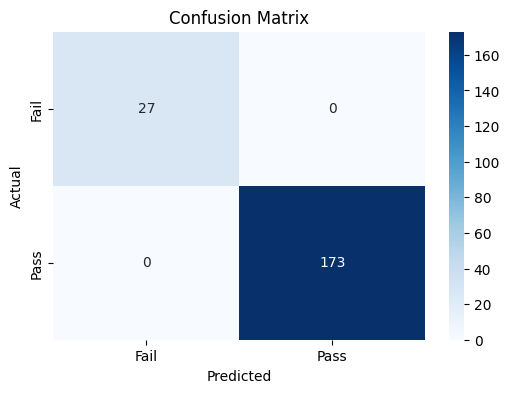

In [27]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


[[ 27   0]
 [  0 173]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00       173

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



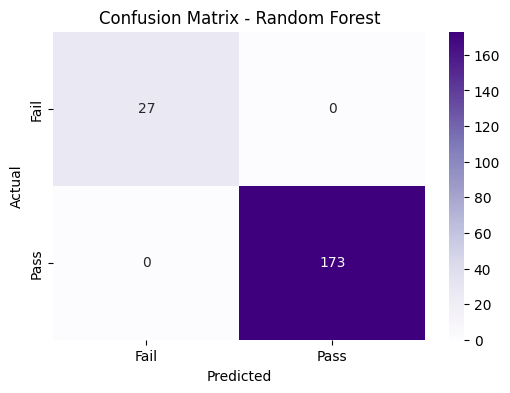

In [29]:
# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

Logistic Regression Accuracy: 100.00%
Random Forest Accuracy: 100.00%


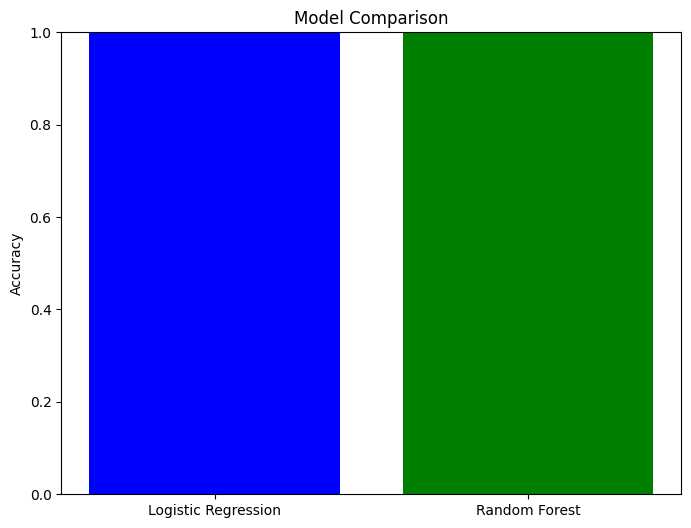

In [30]:
# prompt: plot the acuuracy of logestic abnd random forest in graph give me how much perctage

from sklearn.metrics import accuracy_score

# Assuming y_pred and y_pred_rf are already calculated

lr_accuracy = accuracy_score(y_test, y_pred)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Logistic Regression Accuracy: {lr_accuracy * 100:.2f}%")
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(['Logistic Regression', 'Random Forest'], [lr_accuracy, rf_accuracy], color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
plt.show()
